# k ближайших соседей

Импортируем необходимые библиотеки

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

Теперь выгрузим данные из файла. По параметрам нам нужно определить класс - 0 или 1, который указан в последнем столбце.

In [62]:
data = pd.read_csv("train.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


У нас могут встретиться нулевые значения в столбце с давлением, инсулином или глюкозой, что физически быть не может. Заменим все такие нули на Nan. Затем все NaN меняем на средние значения в столбце.

In [63]:
import math

non_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for coloumn in non_zero:
    data[coloumn] = data[coloumn].replace(0,np.NaN)
    mean = int(data[coloumn].mean(skipna = True))
    data[coloumn] = data[coloumn].replace(np.NaN,mean)

X =data.iloc[:,0:8]
y =data.iloc[:,8]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
math.sqrt(len(y_test))


12.409673645990857

Теперь покажем зависимость частоты встречи диабета в зависимости от параметров(возраст, инсулин, давление и т.д.)

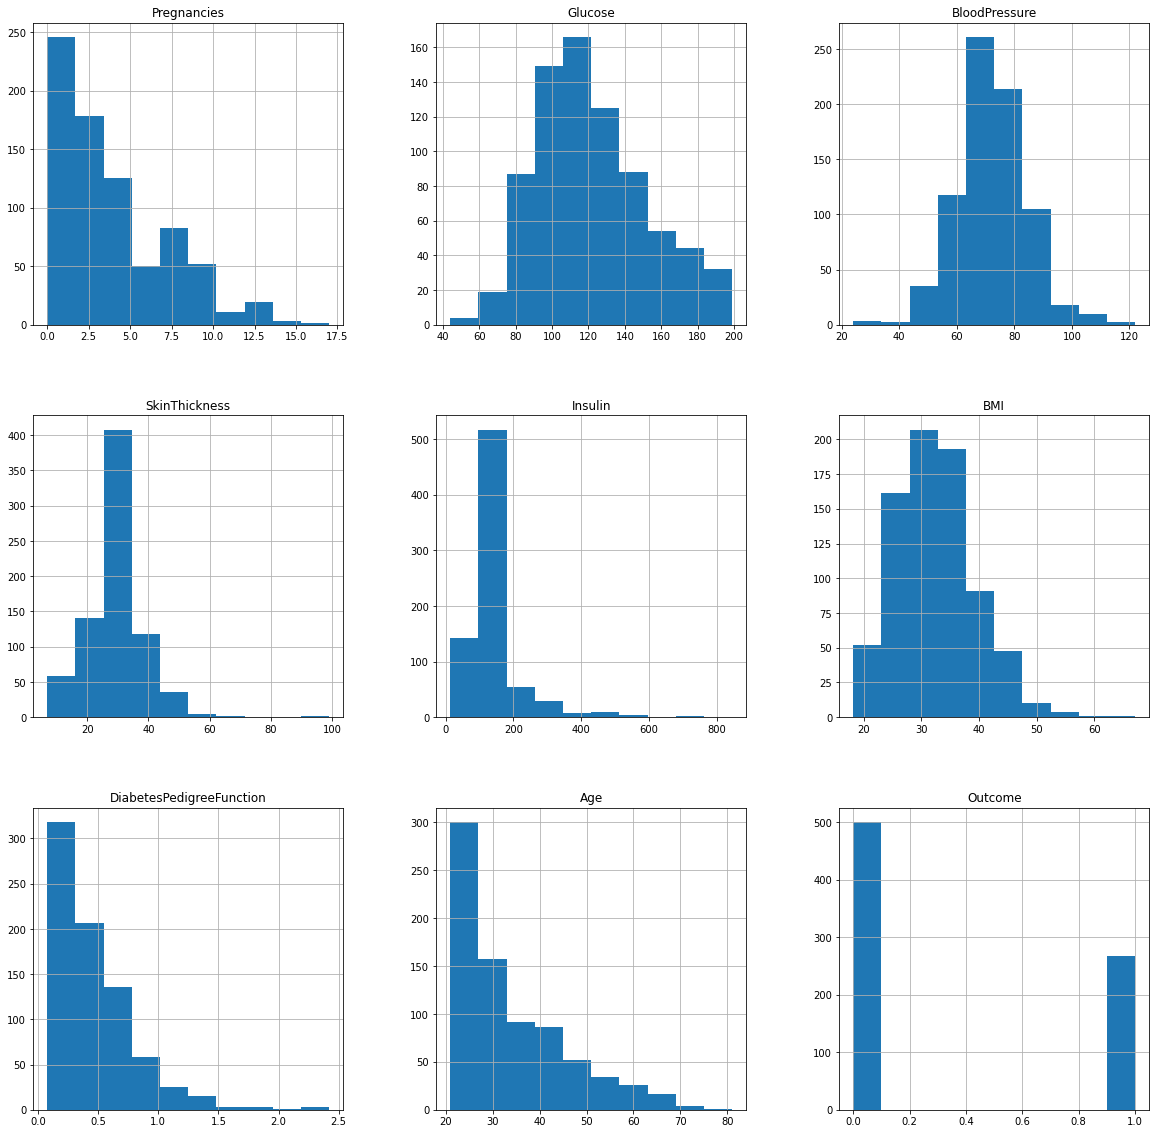

In [64]:
p = data.hist(figsize = (20,20))

Теперь напишем библиотечный классификатор. В качестве k возьмем k=sqrt(n). Кроме этого, лучшего всего k брать нечетным. 

In [65]:
classifier = KNeighborsClassifier(n_neighbors=13,p=2,metric='euclidean')
classifier.fit(X_train,y_train)
y_pred =  classifier.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred))


0.7532467532467533


Построим график

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


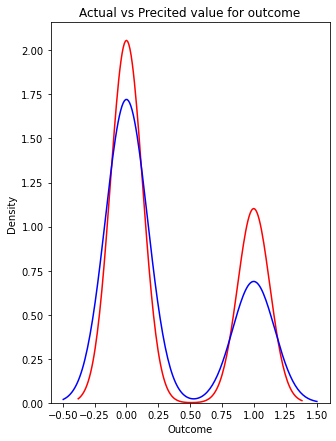

In [66]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(5, 7))
ax = sns.distplot(data['Outcome'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

Теперь напишем свой алгоритм для K-ближайших соседей, по умолчанию вес k = 3

In [67]:


def weightedkNN(x_train, y_train,ps,k=3): 
    ans = []

    for p in ps:
      distance=[] 
      for x, y in zip(x_train, y_train): 
          euclidean_distance = 0
          for feature, feature_p in zip(x,p): 
            euclidean_distance+=(feature_p-feature)**2
          euclidean_distance = math.sqrt(euclidean_distance)
          distance.append((euclidean_distance,y)) 

      distance = sorted(distance)[:k] 
  
      freq1 = 0 # weighted sum of group 0 
      freq2 = 0 # weighted sum of group 1 
  
      for d in distance:
          if d[1] == 0:
              freq1 += (1 / d[0])
              
          elif d[1] == 1: 
              freq2 += (1 /d[0])
              
  
      if freq1>freq2:
        ans.append(0)
      else:
        ans.append(1)
    return ans

y_pred1 =  weightedkNN(X_train, y_train, X_test, 13)
cm= confusion_matrix(y_test,y_pred1)
print(accuracy_score(y_test,y_pred1))

0.7597402597402597


Теперь попробуем вызвать алгоритм с различным K и посмотрим, как это отразится на работе 

In [68]:
print("------------ k = 4 ------------")
y_pred1 =  weightedkNN(X_train, y_train, X_test, 4)
cm= confusion_matrix(y_test,y_pred)
print(f1_score(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print("------------ k = 5 ------------")
y_pred1 =  weightedkNN(X_train, y_train, X_test, 5)
cm= confusion_matrix(y_test,y_pred1)
print(f1_score(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print("------------ k = 6 ------------")
y_pred1 =  weightedkNN(X_train, y_train, X_test, 6)
cm= confusion_matrix(y_test,y_pred1)
print(f1_score(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))

------------ k = 4 ------------
0.6285714285714287
0.7467532467532467
------------ k = 5 ------------
0.62
0.7532467532467533
------------ k = 6 ------------
0.6019417475728156
0.7337662337662337


Самые лучшие результаты видны при k = 13. Построим для k = 13 график 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


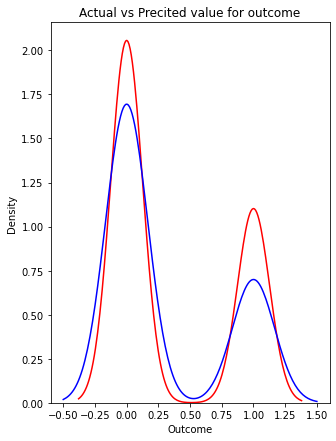

In [69]:
y_pred1 =  weightedkNN(X_train, y_train, X_test, 13)

plt.figure(figsize=(5, 7))
ax = sns.distplot(data['Outcome'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred1, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

# Классификатор Байеса

Для начала возьмем стандартную реализацию из skLearn и посмотрим, как она работает

0.7532467532467533
Confusion Matrix:
[[83 17]
 [21 33]]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


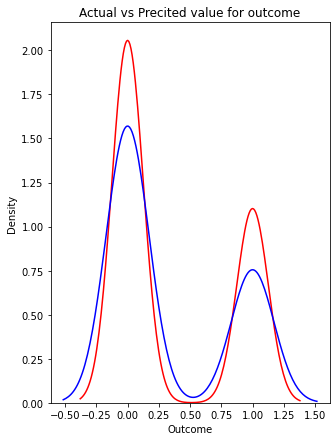

In [70]:
from sklearn.naive_bayes import GaussianNB

X =data.iloc[:,0:8]
y =data.iloc[:,8]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
cm= confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(5, 7))
ax = sns.distplot(data['Outcome'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

Теперь напишем свою реализацию, с использованием распределения Гаусса

In [71]:
class myNaiveBayes:
    def fit(self, X_train, y_train):
        self.classes = np.unique(y_test)
        self.n_classes = len(self.classes)
        self.prior = np.array(X_train.groupby(y_train).apply(lambda col: len(col)) / len(y_train))
        self.mean = np.array(X_train.groupby(y_train).apply(np.mean))
        self.var = np.array(X_train.groupby(y_train).apply(np.var))

    def gauss_distribution(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        return np.exp((-1/2) * ((x-mean)**2) / (2 * var)) / np.sqrt(2 * np.pi * var)

    def predict(self, X_test):
        y_pred = []
        for x in np.array(X_test):
            posteriors = []
            for class_idx in range(self.n_classes):
                prior = np.log(self.prior[class_idx])
                conditional = np.sum(np.log(self.gauss_distribution(class_idx, x)))
                posterior = prior + conditional
                posteriors.append(posterior)
            y_pred.append(self.classes[np.argmax(posteriors)])
        return y_pred

Теперь протестируем его

0.7467532467532467
Confusion Matrix:
[[91  6]
 [33 24]]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


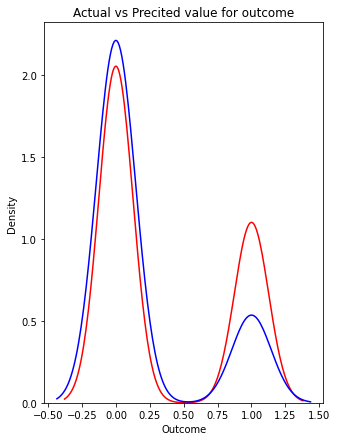

In [72]:
X =data.iloc[:,0:8]
y =data.iloc[:,8]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
my_bayes = myNaiveBayes()
my_bayes.fit(X_train, y_train)
y_pred = my_bayes.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(5, 7))
ax = sns.distplot(data['Outcome'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()